In [29]:
#!/usr/bin/python
%matplotlib inline
import Image, ImageDraw, math, colorsys

dimensions = (256, 256)
scale = 1.0/(dimensions[0]/3)
#center = (2.2, 1.5)       # Use this for Mandelbrot set
center = (1.5, 1.5)       # Use this for Julia set
iterate_max = 100
colors_max = 50

img = Image.new("RGB", dimensions)
d = ImageDraw.Draw(img)

# Calculate a tolerable palette
palette = [0] * colors_max
for i in xrange(colors_max):
    f = 1-abs((float(i)/colors_max-1)**15)
    r, g, b = colorsys.hsv_to_rgb(.66+f/3, 1-f/2, f)
    palette[i] = (int(r*255), int(g*255), int(b*255))

# Calculate the mandelbrot sequence for the point c with start value z
def iterate_mandelbrot(c, z = 0):
    for n in xrange(iterate_max + 1):
        z = z*z +c
        if abs(z) > 2:
            return n
    return None

# Draw our image
for y in xrange(dimensions[1]):
    for x in xrange(dimensions[0]):
        c = complex(x * scale - center[0], y * scale - center[1])

        #n = iterate_mandelbrot(c)            # Use this for Mandelbrot set
        n = iterate_mandelbrot(complex(0.3, 0.6), c)  # Use this for Julia set

        if n is None:
            v = 1
        else:
            v = n/100.0

        d.point((x, y),fill = palette[int(v * (colors_max-1))])
# del d
# img.save("result.png")

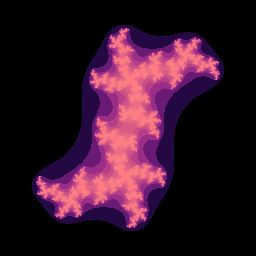

In [30]:
from IPython.display import display
display(img)

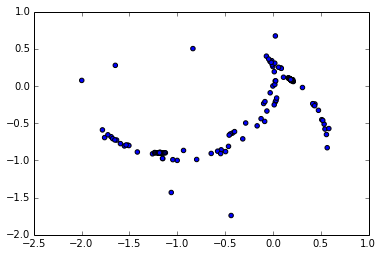

In [24]:
from math import sin, cos
import numpy as np
from matplotlib.path import Path
num_steps = int(1e6)
x = np.ndarray((num_steps))
y = np.ndarray((num_steps))
x[0] = 0.0
y[0] = 0.0
a = -2.24
b = -0.65
c = 0.43
d = -2.43
verts = [(x[0],y[0])]
codes = [Path.MOVETO]
for t in range(num_steps-1):
    x[t+1] = sin(a * y[t]) - cos(b * x[t])
    y[t+1] = sin(c * x[t]) - cos(d * y[t])
#     verts.append((x[t+1],y[t+1]))
#     codes.append( Path.LINETO)

import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

(-2, 2)

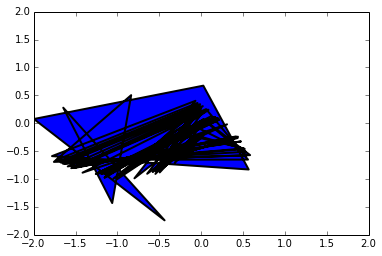

In [21]:
"""draw path"""
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor=None, lw=2)
ax.add_patch(patch)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rc('font', family='serif')

def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt,))
ys = np.empty((stepCnt,))
zs = np.empty((stepCnt,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt-1):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

#save the sequence for training
lorenz_series = np.transpose(np.vstack((xs,ys,zs)))
print(lorenz_series.shape)

import cPickle as pickle
pickle.dump(lorenz_series, open("../../../lorenz_series.pkl","wb"))

(10000, 3)


In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, 'k',lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

#ax.set_title("Lorenz Attractor")

#plt.show()
#plt.savefig("../result/lorenz_attractor.pdf")